## Multicollinearity techniques - feature engineering
- Multicollinearity is a common issue that might affect performance in any machine learning context. Knowing how to discuss this small detail could take our explanation of modeling from good to great and really set us apart in an interview.
- **Task** : creating a baseline model using Linear Regression on the diabetes dataset and explore some of the output metrics. Then we'll practice techniques to visually explore the correlation between the independent variables before finally perform feature engineering on 2 variables that are highly correlated. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error

In [3]:
diabetes = pd.read_csv('data/diabetes.csv')
X = diabetes.drop('progression', axis=1)
y = diabetes['progression']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

- Instantiate, fit, and predict a Linear Regression.
- Print the model coefficients, MSE, and r-squared.

In [4]:
# Instantiate, fit, predict
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)
y_pred = lin_mod.predict(X_test)

# Coefficient estimates
print('Coefficients: \n', lin_mod.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [  10.45384922 -261.16601105  538.84541221  280.72544466 -855.21447839
  472.17305267  166.51881384  309.88763264  684.0489522   102.37723262]
Mean squared error: 2926.80
R_squared score: 0.51


- Create a correlation matrix, plot it to a heatmap.
- Print the matrix to explore the independent variable relationships.

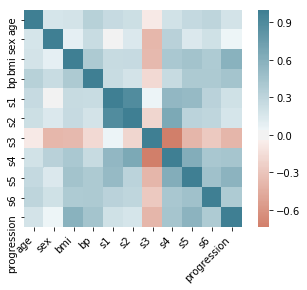

                  age       sex       bmi        bp        s1        s2  \
age          1.000000  0.173737  0.185085  0.335427  0.260061  0.219243   
sex          0.173737  1.000000  0.088161  0.241013  0.035277  0.142637   
bmi          0.185085  0.088161  1.000000  0.395415  0.249777  0.261170   
bp           0.335427  0.241013  0.395415  1.000000  0.242470  0.185558   
s1           0.260061  0.035277  0.249777  0.242470  1.000000  0.896663   
s2           0.219243  0.142637  0.261170  0.185558  0.896663  1.000000   
s3          -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455   
s4           0.203841  0.332115  0.413807  0.257653  0.542207  0.659817   
s5           0.270777  0.149918  0.446159  0.393478  0.515501  0.318353   
s6           0.301731  0.208133  0.388680  0.390429  0.325717  0.290600   
progression  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054   

                   s3        s4        s5        s6  progression  
age         -0.075181  0.203841 

In [5]:
# Correlation matrix
diab_corr = diabetes.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corr, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corr)

- Engineer a new feature by combining s1 and s2 from diabetes, then remove them.
- Split your data into training and testing data with 30% test size and print the column names.

In [6]:
# Feature engineering
diabetes['s1_s2'] = diabetes['s1'] * diabetes['s2']
diabetes = diabetes.drop(['s1','s2'], axis=1)

# Print variable names
print(diabetes.columns)

# Train/test split
X2 = diabetes.drop('progression', axis=1)
y2 = diabetes['progression']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=123)

Index(['age', 'sex', 'bmi', 'bp', 's3', 's4', 's5', 's6', 'progression',
       's1_s2'],
      dtype='object')


- Instantiate, fit, and predict a Linear Regression.
- Print the model coefficients, MSE, and r-squared.

In [7]:
# Instantiate, fit, predict
lin_mod2 = LinearRegression()
lin_mod2.fit(X_train2, y_train2)
y_pred2 = lin_mod2.predict(X_test2)

# Coefficient estimates
print('Coefficients: \n', lin_mod2.coef_)

# Mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test2, y_pred2))

# Explained variance score
print('R_squared score: %.2f' % r2_score(y_test2, y_pred2))

Coefficients: 
 [  -2.33325625 -250.45569362  541.16674251  260.86592129 -338.13983816
  -47.01999461  430.98561453   94.21041896 -283.69973876]
Mean squared error: 2910.42
R_squared score: 0.51


#### Now we know how to get metrics from your baseline model, how to explore relationships visually, and how to use feature engineering to reduce multicollinearity. We got the same R-squared score, but the MSE was slightly lower! Trying different combinations of feature engineering would likely continue to improve the model.

## Multicollinearity techniques - PCA
- In the last exercise we used feature engineering to combine the s1 and s2 independent variables as s1_s2 since they displayed the highest correlation in the diabetes dataset.
- **Task**: We'll perform PCA on diabetes to remove multicollinearity before we apply Linear Regression to it. Then, we'll compare the output metrics to those from the last exercise. Finally, we'll visualize what the correlation matrix and heatmap of the dataset looks like since PCA completely removes multicollinearity.

In [8]:
# Import
from sklearn.decomposition import PCA

C:\Users\Shubham\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


- Instantiate and fit.
- Transform train and test separately.

In [13]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
374,-0.107226,-0.044642,-0.034229,-0.067642,-0.063487,-0.070520,0.008142,-0.039493,-0.000609,-0.079778
420,0.023546,-0.044642,-0.036385,0.000068,0.001183,0.034698,-0.043401,0.034309,-0.033249,0.061054
204,0.110727,0.050680,0.006728,0.028758,-0.027712,-0.007264,-0.047082,0.034309,0.002008,0.077622
263,-0.074533,0.050680,-0.077342,-0.046985,-0.046975,-0.032629,0.004460,-0.039493,-0.072128,-0.017646
285,0.012648,-0.044642,-0.020218,-0.015999,0.012191,0.021233,-0.076536,0.108111,0.059881,-0.021788


In [9]:
# Instantiate
pca = PCA()

# Fit on train
pca.fit(X_train)

# Transform train and test
X_trainPCA = pca.transform(X_train)
X_testPCA = pca.transform(X_test)

In [12]:
X_trainPCA.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.151702,-0.016960,-0.068084,0.076945,0.004199,0.006049,0.041131,0.020627,-0.004424,-0.004917
1,0.033791,0.014986,-0.007369,-0.006305,-0.036504,0.037205,-0.033845,-0.087121,-0.000309,0.000085
2,0.083563,-0.072098,0.050041,-0.075376,-0.059597,0.012291,-0.024200,-0.023898,0.010172,-0.003616
3,-0.119322,-0.026581,-0.067653,-0.047807,0.041819,0.052134,-0.006455,-0.002236,-0.005060,0.005411
4,0.078441,0.004784,-0.076911,0.041092,-0.070295,-0.026402,0.048205,-0.050827,0.023819,-0.004589


- Instantiate, fit, and predict a Linear Regression to PCA transformed dataset.
- Print the model coefficients, MSE, and r-squared

In [10]:
# Instantiate, fit, predict
LinRegr = LinearRegression()
LinRegr.fit(X_trainPCA, y_train)
predictions = LinRegr.predict(X_testPCA)

# The coefficients
print('Coefficients: \n', LinRegr.coef_)

# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, predictions))

Coefficients: 
 [  431.83041038  -293.77173602   253.57573406   568.70922969
   -67.51943277  -186.26488336    71.89012557    47.21891689
    93.98511769 -1130.48023791]
Mean squared error: 2926.80
Variance score: 0.51


- Create a correlation matrix, plot it to a heatmap.
- Print the matrix to explore the independent variable relationships.

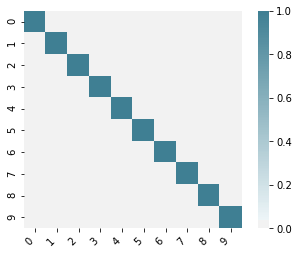

              0             1             2             3             4  \
0  1.000000e+00 -3.017855e-16  6.063410e-17 -9.623671e-17  9.617392e-16   
1 -3.017855e-16  1.000000e+00 -2.236114e-16 -3.476124e-16  1.943732e-16   
2  6.063410e-17 -2.236114e-16  1.000000e+00 -9.793741e-17  4.701620e-17   
3 -9.623671e-17 -3.476124e-16 -9.793741e-17  1.000000e+00 -1.080915e-16   
4  9.617392e-16  1.943732e-16  4.701620e-17 -1.080915e-16  1.000000e+00   
5  3.020790e-16 -6.414429e-17 -8.451099e-17 -1.554285e-16 -2.336328e-16   
6 -4.308509e-17 -3.571030e-16 -1.545062e-18 -2.945942e-16  8.637883e-17   
7  1.715343e-16  9.823794e-17  2.552183e-17 -2.233830e-16  3.108671e-16   
8  5.637363e-16 -9.936824e-16  4.103661e-16  9.836595e-16  3.235043e-17   
9 -9.709772e-16  1.366355e-15  5.684313e-16  1.157833e-15  1.475857e-16   

              5             6             7             8             9  
0  3.020790e-16 -4.308509e-17  1.715343e-16  5.637363e-16 -9.709772e-16  
1 -6.414429e-17 -3.571030e

In [11]:
# Correlation matrix
X_trainPCA = pd.DataFrame(X_trainPCA)
diab_corrPCA = X_trainPCA.corr()

# Generate correlation heatmap
ax = sns.heatmap(diab_corrPCA, center=0, cmap=sns.diverging_palette(20,220, n=256), square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

# Print correlations
print(diab_corrPCA)

### This simple change, although it didn't improve your metrics, removed all of the multicollinearity in the diabetes dataset!